# Homework 1

In [38]:
library(kernlab)
library(kknn)

## Read Data

In [1]:
data <- read.delim("credit_card_data-headers.txt", header = TRUE, sep = "\t", dec = ".")

## Explore dataset

In [89]:
head(data)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


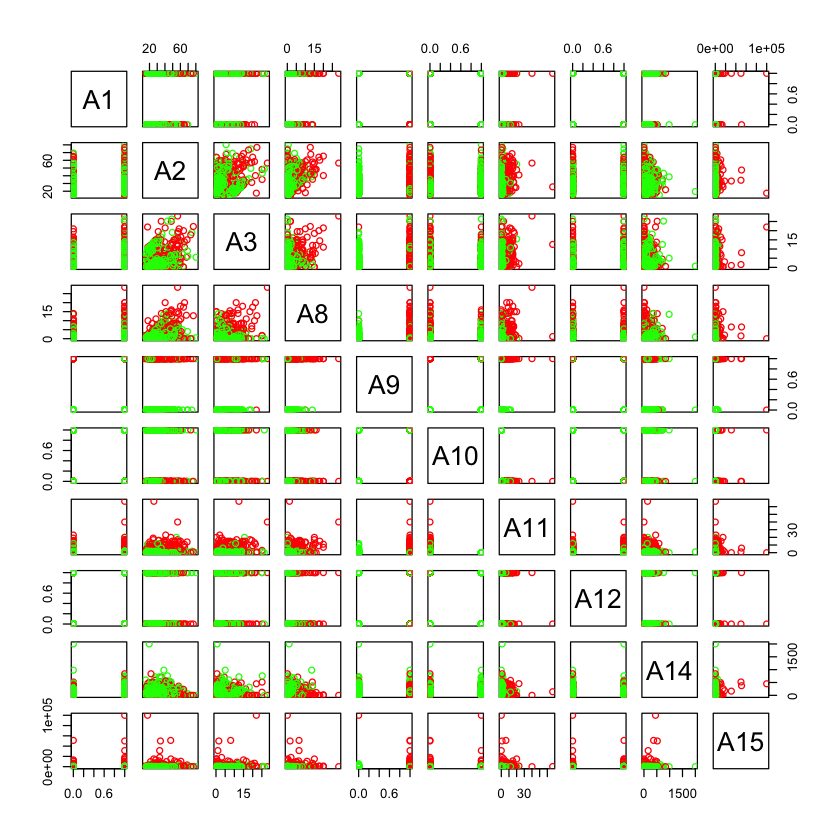

In [81]:
plot(data[,1:10], col=ifelse(data[,11]==1,'red','green'))

# SVM

In [39]:
svm <- function(C, kernel){
    model <- ksvm(R1~A1+A2+A3+A8+A9+A10+A11+A12+A14+A15,
                  data=data,
                  type="C-svc",
                  kernel=kernel,
                  C=C,
                  scaled=TRUE)
    pred <- predict(model, data[,1:10])
    performance <- sum(pred == data[,11]) / nrow(data)
    
    return(performance)
}

In [40]:
svm(C=100, kernel="vanilladot")

 Setting default kernel parameters  


[1] 0.8639144

## Try differnt values for c

In [108]:
cValues <- 10^(-10:10)
performance <- c()

for (i in seq_along(cValues)) {   
    performance[i] <- svm(C=cValues[i], kernel="vanilladot")
}

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  


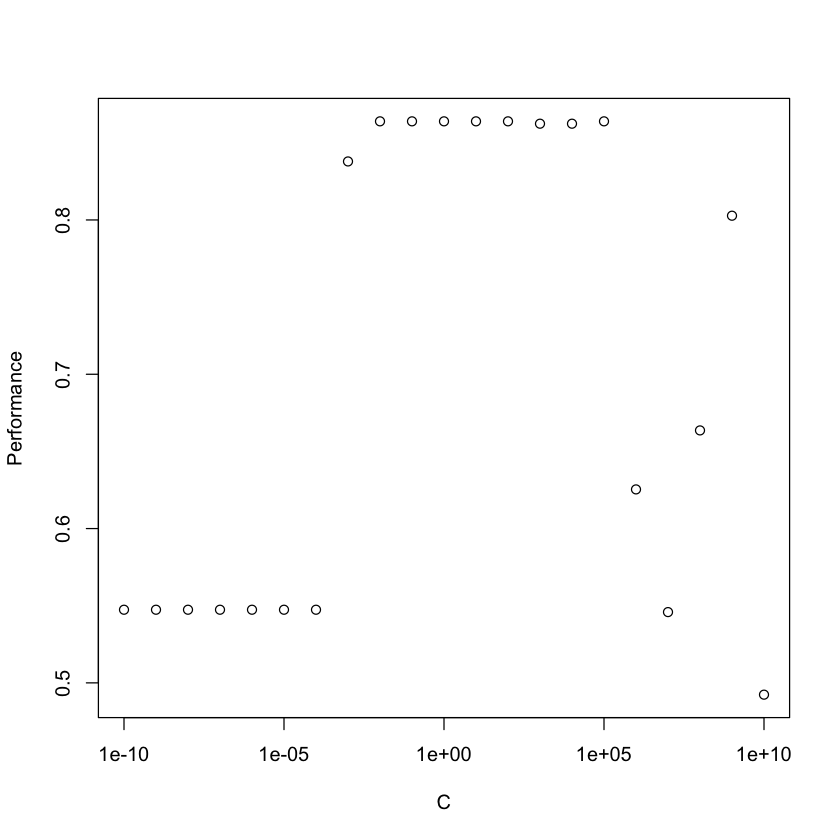

In [88]:
plot(data.frame("C" = cValues, "Performance" = performance), log='x')

### Get coefficients

In [122]:
max(performance)

[1] 0.8639144

In [112]:
cValues[which(performance==max(performance))]

[1] 1e-02 1e-01 1e+00 1e+01 1e+02 1e+05

In [121]:
model <- ksvm(R1~A1+A2+A3+A8+A9+A10+A11+A12+A14+A15,
              data=data,
              type="C-svc",
              kernel="vanilladot",
              C=1,
              scaled=TRUE)

a <- colSums(model@xmatrix[[1]] * model@coef[[1]])
a0 <- -model@b

print(a)
print(a0)

 Setting default kernel parameters  
           A1            A2            A3            A8            A9 
-0.0011026642 -0.0008980539 -0.0016074557  0.0029041700  1.0047363456 
          A10           A11           A12           A14           A15 
-0.0029852110 -0.0002035179 -0.0005504803 -0.0012519187  0.1064404601 
[1] 0.08148382


### Try other kernels

In [90]:
kernels <- c("rbfdot", "polydot", "vanilladot", "tanhdot","laplacedot", "besseldot", "anovadot", "splinedot")
performance <- c()

for (i in seq_along(kernels)) {
    performance[i] <- svm(C=100, kernel=kernels[i])
}

 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  
 Setting default kernel parameters  


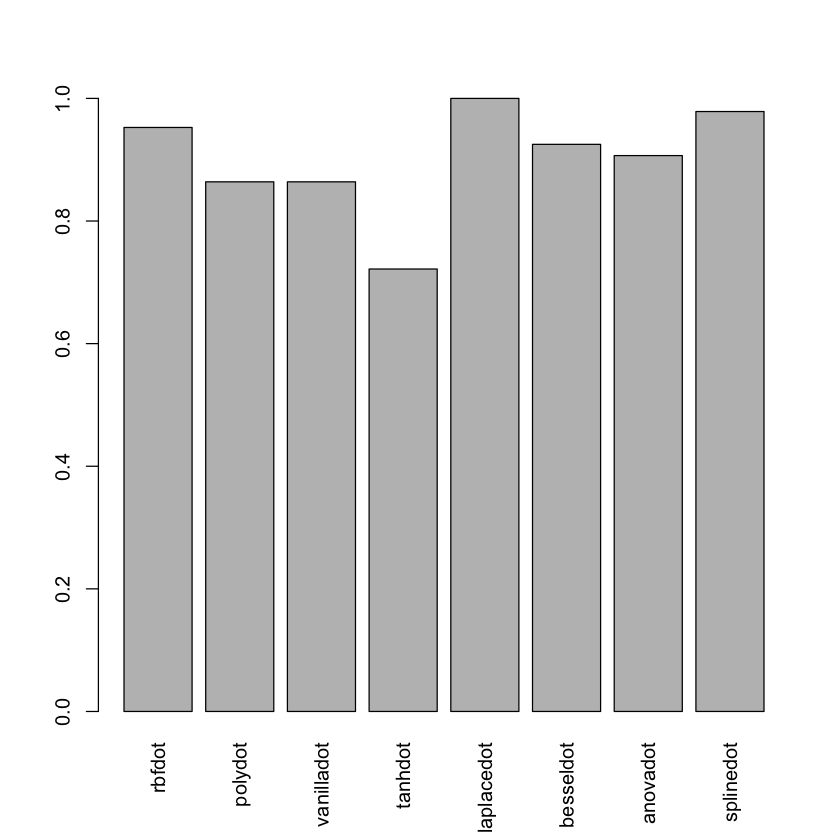

In [98]:
barplot(performance, names.arg=kernels, las=3)

## KNN

In [68]:
knn <- function(k){
    pred <- c()
    for (i in 1:nrow(data)){
        model <- kknn(R1~A1+A2+A3+A8+A9+A10+A11+A12+A14+A15,
                      train=data[-i,],
                      test=data[i,],
                      k=k,
                      distance=2,
                      kernel="optimal",
                      scale=TRUE)

        pred[i] <- fitted.values(model)
    }
    performance <- sum(round(pred) == data[,11]) / nrow(data)
    return(performance)
}

In [65]:
knn(k=10)

[1] 0.8501529

### Try different values for k

In [123]:
kValues <- 1:100
performance <- c()

for (i in seq_along(kValues)) {   
    performance[i] <- knn(k=kValues[i])
}

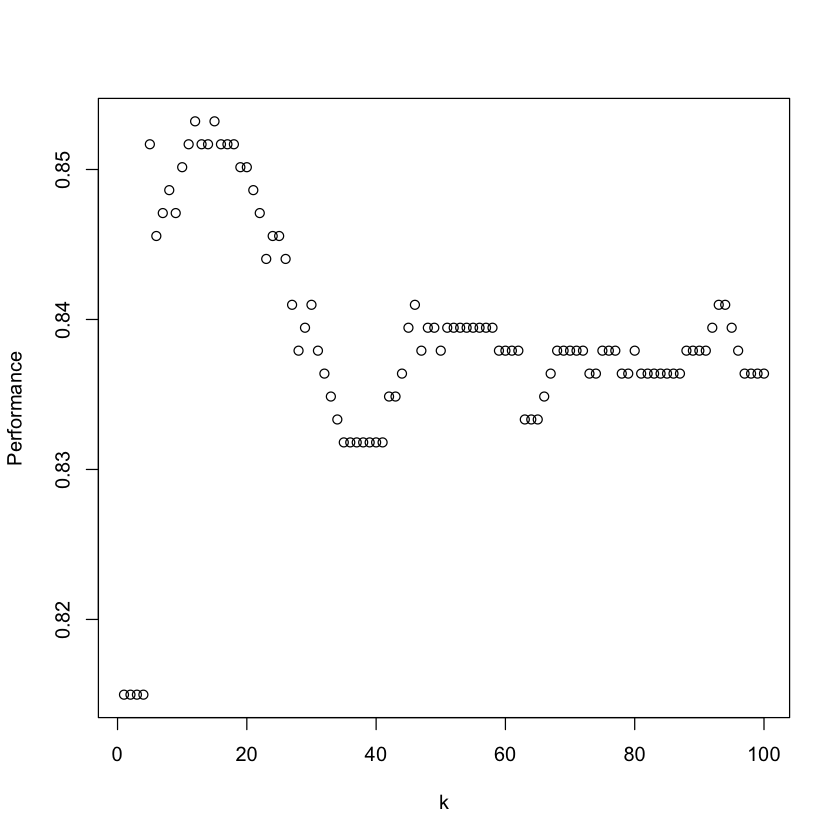

In [124]:
plot(data.frame("k" = kValues, "Performance" = performance))

In [125]:
max(performance)

[1] 0.853211

In [126]:
kValues[which(performance==max(performance))]

[1] 12 15